In [255]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-churn/employee_churn.csv


In [256]:
df=pd.read_csv('/kaggle/input/employee-churn/employee_churn.csv')

In [257]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [258]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [259]:
df['salary'].replace(['low','medium','high'],[0,1,2],inplace=True)

In [260]:
df['status'].replace(['Left','Employed'],[0,1],inplace=True)

In [261]:
df['department'].replace(['engineering', 'support', 'sales', 'IT', 'product', 'marketing','temp', 'procurement', 'finance', 'management','information_technology', 'admin'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

In [262]:
df['recently_promoted'].fillna(0,inplace=True)

In [263]:
df['filed_complaint'].fillna(0,inplace=True)

In [264]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,0.0,0.0,0.932868,4,0.0,0,0.829896,0,5.0
1,232,1.0,0.0,NaN,3,0.0,0,0.834544,1,2.0
2,184,2.0,0.0,0.788830,3,0.0,1,0.834988,1,3.0
3,206,2.0,0.0,0.575688,4,0.0,0,0.424764,1,2.0
4,249,2.0,0.0,0.845217,3,0.0,0,0.779043,1,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,3.0,0.0,0.735865,5,0.0,0,0.263282,1,5.0
14245,257,2.0,0.0,0.638604,3,0.0,0,0.868209,1,2.0
14246,232,8.0,1.0,0.847623,5,0.0,1,0.898917,0,5.0
14247,130,3.0,0.0,0.757184,4,0.0,1,0.641304,1,3.0


In [265]:
df=df.dropna()

In [266]:
y=df['status']
X=df.drop(['status'],axis=1)


In [267]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X1=scale.fit_transform(X)

In [268]:
X1= pd.DataFrame(X1, columns=X.columns)
X1

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,0.372360,-1.006440,-0.408800,1.239269,0.123052,-0.146585,-0.935937,0.834811,0.928172
1,-0.364093,-0.286020,-0.408800,0.406557,-0.677949,-0.146585,0.641375,0.854833,-0.391465
2,0.073798,-0.286020,-0.408800,-0.825661,0.123052,-0.146585,-0.935937,-0.758359,-1.051283
3,0.929676,-0.286020,-0.408800,0.732545,-0.677949,-0.146585,-0.935937,0.634833,-0.391465
4,-1.239876,-0.286020,-0.408800,-0.748138,0.123052,-0.146585,0.641375,0.166777,0.268353
...,...,...,...,...,...,...,...,...,...
12070,1.387472,-1.006440,-0.408800,0.560766,0.123052,-0.146585,-0.935937,0.297993,-1.051283
12071,-0.483518,0.074190,-0.408800,0.100357,0.924054,-0.146585,-0.935937,-1.393383,0.928172
12072,1.088909,-0.286020,-0.408800,-0.461933,-0.677949,-0.146585,-0.935937,0.985476,-1.051283
12073,0.591306,1.875239,2.446182,0.746452,0.924054,-0.146585,0.641375,1.106236,0.928172


In [269]:
y1=pd.DataFrame(y)
y1=y1.reset_index(drop=True)

In [270]:
X1['status']=y1['status']

In [271]:
X1

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,status
0,0.372360,-1.006440,-0.408800,1.239269,0.123052,-0.146585,-0.935937,0.834811,0.928172,0
1,-0.364093,-0.286020,-0.408800,0.406557,-0.677949,-0.146585,0.641375,0.854833,-0.391465,1
2,0.073798,-0.286020,-0.408800,-0.825661,0.123052,-0.146585,-0.935937,-0.758359,-1.051283,1
3,0.929676,-0.286020,-0.408800,0.732545,-0.677949,-0.146585,-0.935937,0.634833,-0.391465,1
4,-1.239876,-0.286020,-0.408800,-0.748138,0.123052,-0.146585,0.641375,0.166777,0.268353,1
...,...,...,...,...,...,...,...,...,...,...
12070,1.387472,-1.006440,-0.408800,0.560766,0.123052,-0.146585,-0.935937,0.297993,-1.051283,1
12071,-0.483518,0.074190,-0.408800,0.100357,0.924054,-0.146585,-0.935937,-1.393383,0.928172,1
12072,1.088909,-0.286020,-0.408800,-0.461933,-0.677949,-0.146585,-0.935937,0.985476,-1.051283,1
12073,0.591306,1.875239,2.446182,0.746452,0.924054,-0.146585,0.641375,1.106236,0.928172,0


<AxesSubplot:>

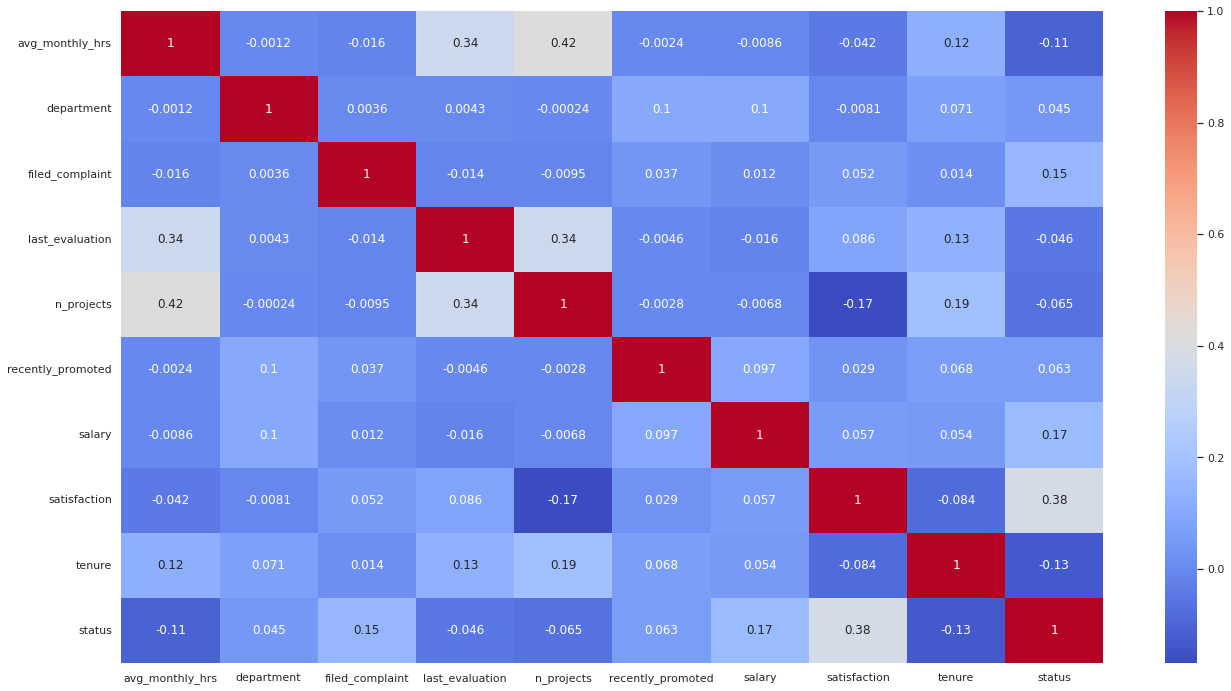

In [272]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(22,12)})
sns.heatmap(X1.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [273]:
X2=X1.drop(['status'],axis=1)
y2=X1['status']
from sklearn.model_selection import train_test_split

In [275]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2 , random_state=1)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train2, y_train2)

LogisticRegression()

In [278]:
y_pred3=logisticRegr.predict(X_test2)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test2, y_pred3)
cm
print(metrics.accuracy_score(y_test2, y_pred3))

0.7805383022774327


In [279]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train2, y_train2)

RandomForestClassifier()

In [281]:
y_pred4=clf.predict(X_test2)
y_pred4
print(metrics.accuracy_score(y_test2, y_pred4))

0.9817805383022774


In [282]:
from sklearn import svm
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train2, y_train2)
y_pred6 = clf1.predict(X_test2)
y_pred6

array([1, 1, 1, ..., 1, 1, 1])

In [283]:
print(metrics.accuracy_score(y_test2, y_pred6))

0.7987577639751553
